## Introducing Data Science Workflows

In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")

In [7]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.shape


(1460, 81)

In [9]:
holdout.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
holdout.shape

(1459, 80)

In [11]:
len(df)

1460

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

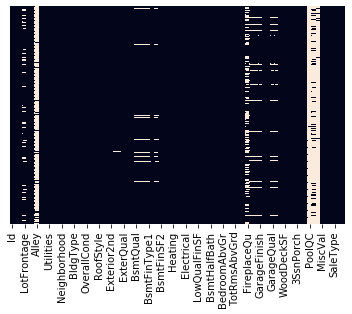

In [15]:
sns.heatmap(df.isnull(),yticklabels= False, cbar=False)

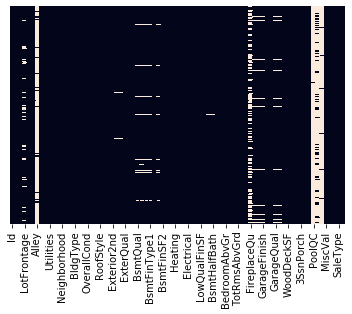

In [16]:
sns.heatmap(holdout.isnull(),yticklabels= False, cbar=False)

In [17]:
half_count_df = len(df)/2
df = df.dropna(thresh=half_count_df,axis=1)

In [18]:
half_count_test = len(holdout)/2
holdout = holdout.dropna(thresh=half_count_test,axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

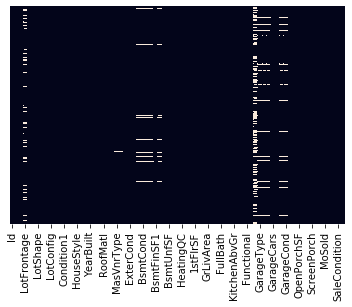

In [20]:
sns.heatmap(df.isnull(),yticklabels= False, cbar=False)

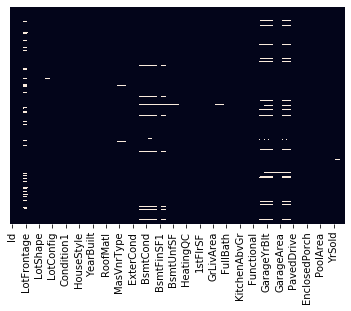

In [21]:
sns.heatmap(holdout.isnull(),yticklabels= False, cbar=False)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [23]:

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [24]:
holdout['LotFrontage']=holdout.fillna(holdout['LotFrontage'].mean())

In [25]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

In [26]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [27]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [28]:
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [29]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [30]:
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [31]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [32]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [33]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [34]:
#test data cleaning

In [35]:
holdout['BsmtQual'] = holdout['BsmtQual'].fillna(holdout['BsmtQual'].mode()[0])

In [36]:
holdout['GarageType'] = holdout['GarageType'].fillna(holdout['GarageType'].mode()[0])

In [37]:
holdout['GarageYrBlt'] = holdout['GarageYrBlt'].fillna(holdout['GarageYrBlt'].mean())

In [38]:
holdout['GarageFinish'] = holdout['GarageFinish'].fillna(holdout['GarageFinish'].mode()[0])

In [39]:
holdout['GarageFinish'] = holdout['GarageFinish'].fillna(holdout['GarageFinish'].mode()[0])

In [40]:
holdout['GarageQual'] = holdout['GarageQual'].fillna(holdout['GarageQual'].mode()[0])

In [41]:
holdout['GarageCond'] = holdout['GarageCond'].fillna(holdout['GarageCond'].mode()[0])

In [42]:
holdout['GarageCond'] = holdout['GarageCond'].fillna(holdout['GarageCond'].mode()[0])

In [43]:
holdout['MasVnrArea'] = holdout['MasVnrArea'].fillna(holdout['MasVnrArea'].mean())

In [44]:
df.drop(['Id'], axis =1 , inplace=True)

In [45]:
df.shape

(1460, 76)

In [46]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [47]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [48]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [49]:
holdout['BsmtCond'] = holdout['BsmtCond'].fillna(holdout['BsmtCond'].mode()[0])

In [50]:
holdout['BsmtExposure'] = holdout['BsmtExposure'].fillna(holdout['BsmtExposure'].mode()[0])

In [51]:
holdout['BsmtFinType1'] = holdout['BsmtFinType1'].fillna(holdout['BsmtFinType1'].mode()[0])

In [52]:
holdout['BsmtFinType2'] = holdout['BsmtFinType2'].fillna(holdout['BsmtFinType2'].mode()[0])

In [53]:
holdout['Utilities']=holdout['Utilities'].fillna(holdout['Utilities'].mode()[0])
holdout['Exterior1st']=holdout['Exterior1st'].fillna(holdout['Exterior1st'].mode()[0])
holdout['Exterior2nd']=holdout['Exterior2nd'].fillna(holdout['Exterior2nd'].mode()[0])

holdout['BsmtFinSF1']=holdout['BsmtFinSF1'].fillna(holdout['BsmtFinSF1'].mean())
holdout['BsmtFinSF2']=holdout['BsmtFinSF2'].fillna(holdout['BsmtFinSF2'].mean())
holdout['BsmtUnfSF']=holdout['BsmtUnfSF'].fillna(holdout['BsmtUnfSF'].mean())
holdout['TotalBsmtSF']=holdout['TotalBsmtSF'].fillna(holdout['TotalBsmtSF'].mean())
holdout['BsmtFullBath']=holdout['BsmtFullBath'].fillna(holdout['BsmtFullBath'].mode()[0])
holdout['BsmtHalfBath']=holdout['BsmtHalfBath'].fillna(holdout['BsmtHalfBath'].mode()[0])
holdout['KitchenQual']=holdout['KitchenQual'].fillna(holdout['KitchenQual'].mode()[0])
holdout['Functional']=holdout['Functional'].fillna(holdout['Functional'].mode()[0])
holdout['GarageCars']=holdout['GarageCars'].fillna(holdout['GarageCars'].mean())
holdout['GarageArea']=holdout['GarageArea'].fillna(holdout['GarageArea'].mean())
holdout['SaleType']=holdout['SaleType'].fillna(holdout['SaleType'].mode()[0])

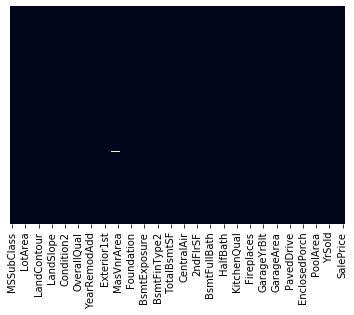

In [54]:
sns.heatmap(df.isnull(),yticklabels= False, cbar=False)

In [55]:
holdout.drop(['Id'],axis=1,inplace=True)

In [56]:

holdout.to_csv('formulate_holdout.csv',index=False)

In [57]:
df.dropna(inplace=True)

In [58]:
df.shape

(1451, 76)

In [59]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-null object
MasVnrType       1451 no

In [61]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond', 'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure',
         'BsmtFinType1','BsmtFinType2', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
         'Heating','HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [62]:
len(columns)

39

In [63]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [64]:
for col in columns:
    print(df[col].value_counts())

RL         1145
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1445
Grvl       6
Name: Street, dtype: int64
Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1302
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1045
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1373
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
BrkSide     58
SawyerW     58
Crawfor     50
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1436
Feedr        6
RRNn       

In [65]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [66]:
main_df=df.copy()

In [67]:

## Combine Test Data 

test_df=pd.read_csv('formulate_holdout.csv')

In [68]:
test_df.shape


(1459, 74)

In [69]:

test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,1461,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,1462,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,1463,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,1464,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,1465,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [70]:
final_df=pd.concat([df,test_df],axis=0)

In [71]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1429         NaN
1430         NaN
1431         NaN
1432         NaN
1433         NaN
1434         NaN
1435         NaN
1436         NaN
1437         NaN
1438         NaN
1439         NaN
1440         NaN
1441         NaN
1442         NaN
1443         NaN
1444         NaN
1445         NaN
1446         NaN
1447         NaN
1448         NaN
1449         NaN
1450         NaN
1451         NaN
1452         NaN
1453         NaN
1454         NaN
1455         NaN
1456         N

In [72]:
final_df.shape

(2910, 76)

In [73]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [74]:
final_df.shape

(2910, 237)

In [75]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [76]:
final_df.shape

(2910, 177)

In [77]:
final_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [80]:
df_train=final_df.iloc[:1422,:]
df_test=final_df.iloc[1422:,:]

In [81]:
df_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [82]:
df_test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
1431,958,0,0,2,958.0,0.0,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,1,0
1432,968,0,0,4,0.0,0.0,0.0,0.0,656.0,0,...,0,0,1,0,0,0,0,1,0,0
1433,962,830,0,3,0.0,0.0,1.0,0.0,936.0,0,...,0,0,1,1,0,0,0,0,0,0
1434,1126,0,0,3,936.0,0.0,1.0,0.0,190.0,0,...,0,0,1,1,0,0,0,0,1,1
1435,1537,0,0,3,0.0,0.0,1.0,0.0,1319.0,0,...,0,0,1,1,0,0,0,0,1,0


In [83]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [84]:
X_train=df_train.drop(['SalePrice'],axis=1)
y_train=df_train['SalePrice']

In [85]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [86]:
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

In [87]:
# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

In [91]:
# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics



# mse = mean_squared_error(df_test, y_pred)
# rmse = math.sqrt(mse)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_score_))
# print("Tuned ElasticNet R squared: {}".format(r2))
# print("Tuned ElasticNet RMSE: {}".format(rmse))

C:\Users\naim_\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.9655172413793103}
Tuned ElasticNet l1 ratio: 0.8144030549451015


In [95]:
y_pred = gm_cv.predict(df_test.drop(['SalePrice'],axis=1))
y_pred


array([ 124024.32336794,   79797.29346382,  196910.66415906, ...,
       -101833.00967826, -161717.03585059,  -26132.96172952])

In [13]:
import xgboost